# What is an Image?

- A digital image contains a series of pixels arranged in a grid-like fashion that contains pixel values to denote how bright and what colour each pixel should be.
- The brightness & colour can be represented as a numerical vector.

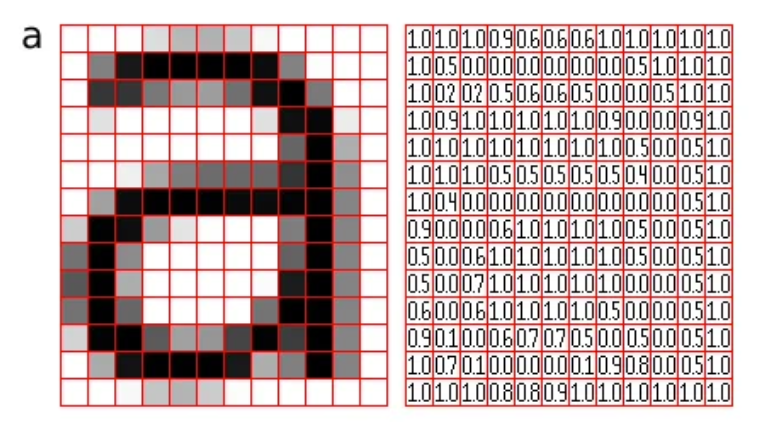


# What is a Kernel?




- Kernels (a matrix) are applied on top of images to achieve many transformations & detections - edge detection, human detection, face detection, blur, smoothening, etc.


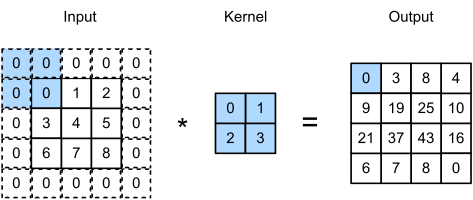

Let's look at a detailed example: https://setosa.io/ev/image-kernels/

- Modern day deep learning networks allow for complex kernel creation in an automated fashion.




# Perceptron (or Neuron) - A recap

- It has four main parameters: input values, weights and Bias, net sum, and an activation function.
- Bias provide an offset (map it to intercept).
- Weight represent impact of each input value.
- Activation function scales the overall output to a predefined range, and add non-linearity overall.
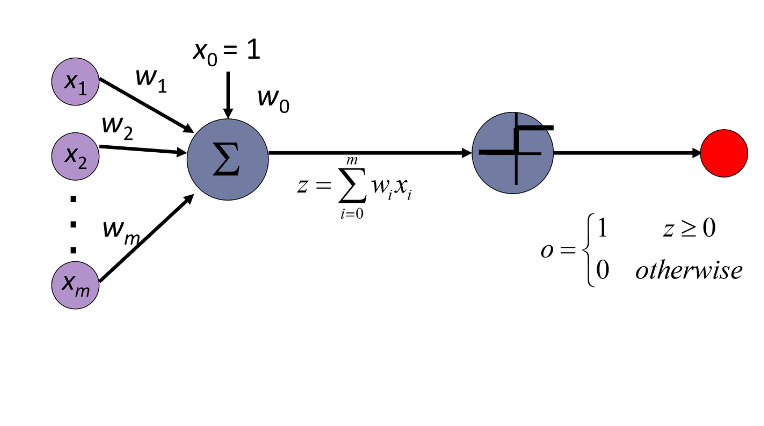


# Convolutional Neural Network
A CNN typically has three layers: a convolutional layer, a pooling layer, and a fully connected layer.

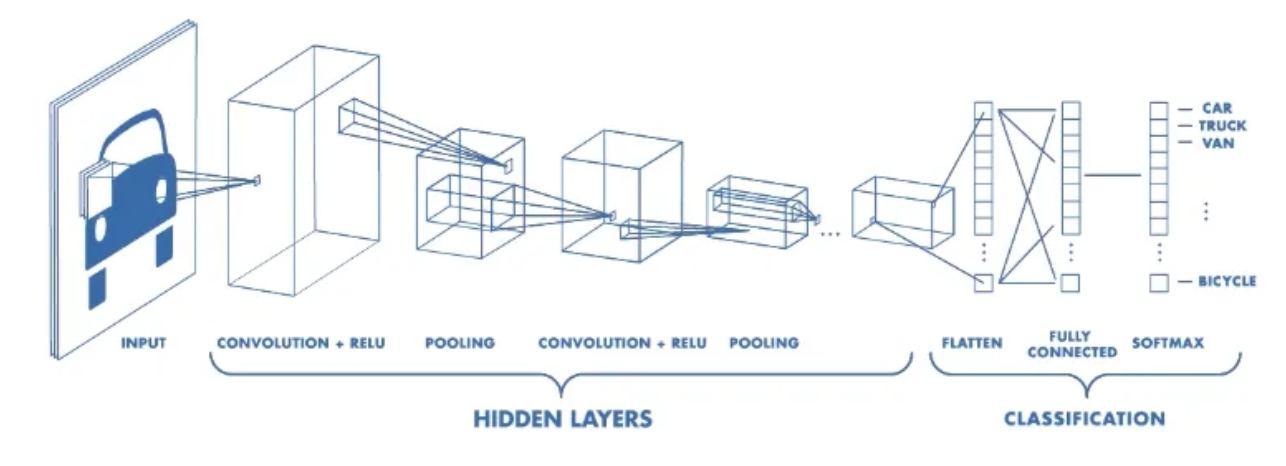

## The Convolution Layer

- The convolution layer is the core building block of the CNN. It carries the main portion of the network’s computational load.
- This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the small portion of the input image.
This process is called convolution.
- Convolution leverages three important ideas that motivated computer vision researchers: sparse interaction, parameter sharing, and equivariant representation.


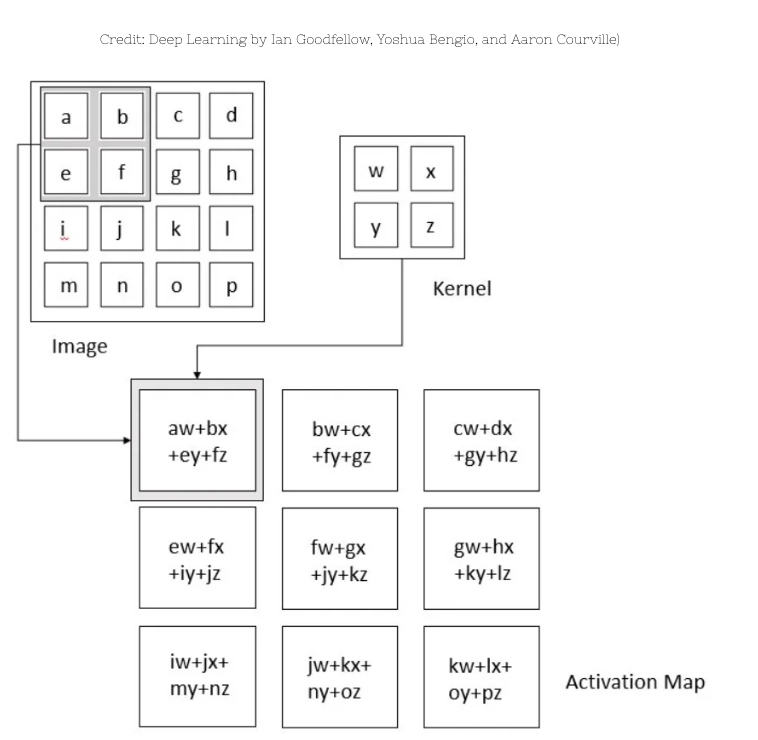

## The Pooling Layer

- The pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs.
- This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights.
- There are several pooling functions such as the average of the rectangular neighborhood, L2 norm of the rectangular neighborhood, and a weighted average based on the distance from the central pixel.
- However, the most popular process is max pooling, which reports the maximum output from the neighborhood.


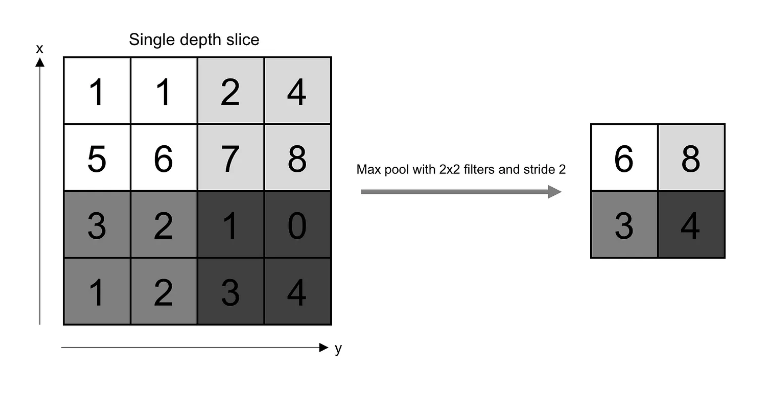


https://miro.medium.com/v2/resize:fit:1400/1*ulfFYH5HbWpLTIfuebj5mQ.gif

## The Fully Connected Layer

- Neurons in this layer have full connectivity with all neurons in the preceding and succeeding layer as seen in regular ANN.

- The FC layer helps to map the representation between the input and the output.


# Convolutional Neural Networks for MNIST Dataset Classification

## Basic Setup

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist
# (training_images, training_images_labels), (testing_images, testing_images_labels)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# There are 60K images in the training dataset
x_train.shape

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

In [ ]:
single_image.shape

In [ ]:
plt.imshow(single_image, cmap = 'binary');

## Preprocessing Data

### Preprocessing the labels

In [ ]:
y_train

In [ ]:
y_train[0]

In [ ]:
y_test

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [ ]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)
y_example

In [ ]:
y_example.shape

In [ ]:
y_example[0]
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

### Preprocessing the Input

In [ ]:
print(single_image.max())
print(single_image.min())

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
scaled_single = x_train[0]

In [ ]:
scaled_single.max()

In [ ]:
scaled_single.min()

In [ ]:
plt.imshow(scaled_single, cmap = 'binary')

### Reshaping the data
Right now our data is 60,000 images stored in 28 by 28 pixel array formation.

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 values in a tuple.

In [ ]:
# Reshape to include channel dimension (in this case, 1 channel)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

## Model Instantiation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
help(Conv2D)

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=16, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 784 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [ ]:
model.summary()

## Model Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)

## Model Predictions

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

In [ ]:
# [0.01, 0.4, 0.08, 0.08, 0.08, 0.01, 0.3, 0.07, 0.07, 0.07]
# [0,     1,    2,    3,    4,    5,    6,    7,    8,    9]

In [ ]:
y_cat_test.shape

In [ ]:
y_cat_test[0]

In [ ]:
predictions[0]

In [ ]:
y_test

## Model Evaluation

In [ ]:
model.metrics_names

In [ ]:
losses.head()

In [ ]:
losses[['accuracy','val_accuracy']].plot();

In [ ]:
losses[['loss','val_loss']].plot();

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

## Predicting on one data point

In [ ]:
my_number = x_test[0] # (28, 28, 1)
plt.imshow(my_number.reshape(28,28), cmap = 'binary');

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
my_prediction = model.predict(my_number.reshape(1,28,28,1))
my_prediction = np.argmax(my_prediction, axis=-1)
print(my_prediction)